# Определение перспективного тарифа для телеком компании

# Содержание:
* [Шаг 1. Изучение и знакомство с данными](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* [Шаг 3. Анализ данных](#third-bullet)
* [Шаг 4. Проверим гипотезы](#fourth-bullet)
* [Шаг 5. Общий вывод](#fifth-bullet)

## Описание проекта



Клиентам предлагают два тарифных плана: «Смарт» и «Ультра» компании «Мегалайн» — федерального оператора сотовой связи. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание данных

### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

# Шаг 1. Изучение и знакомство с данными 
<a id="first-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try: 
    df_users = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных/users.csv')
    df_calls = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных/calls.csv')
    df_messages = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных/messages.csv')
    df_internet = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных/internet.csv',index_col=0)
    df_tariffs = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных/tariffs.csv')
except:
    df_users = pd.read_csv('/datasets/users.csv')
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_internet = pd.read_csv('/datasets/internet.csv',index_col=0)
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')


In [3]:
#cнижает размерность чисел для вывода на экран на всем проекте и помогает с экспоненциальной записью чисел
pd.options.display.float_format = '{:,.2f}'.format

## Вывод
Необходимо подробно ознакомитьс с каждым датасетом по отдельности.

## Пользователи

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
df_users.describe(include='all')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.00,500.00,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,"1,249.50",46.59,NaN,NaN,NaN,NaN,NaN,NaN
std,144.48,16.67,NaN,NaN,NaN,NaN,NaN,NaN
min,"1,000.00",18.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,124.75",32.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,"1,249.50",46.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,"1,374.25",62.00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_users.isna().sum()
print('Количество дубликатов: {}'.format(df_users.duplicated().sum()))

Количество дубликатов: 0


### Выводы
Пропуски в данных отсутствуют, дубликатов не выявлено. В таблице представлены данные 500 пользователей, 462 из них все еще пользуются тарифом.

Для дальнейшего анализ значения в столбцах необходимо привести к типу DateTime:

* reg_date дата подключения тарифа;
* churn_date дата прекращения пользования тарифом.



## Звонки

In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [10]:
df_calls.describe(include='all')

,id,call_date,duration,user_id
count,202607,202607,"202,607.00","202,607.00"
unique,202607,365,NaN,NaN
top,1000_0,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.76,"1,253.94"
std,NaN,NaN,5.84,144.72
min,NaN,NaN,0.00,"1,000.00"
25%,NaN,NaN,1.30,"1,126.00"
50%,NaN,NaN,6.00,"1,260.00"
75%,NaN,NaN,10.70,"1,379.00"


In [11]:
print('Количество дубликатов: {}'.format(df_calls.duplicated().sum()))

print('Количество звонков, у которых длительность звонка менее 1 минуты: {}'.format(len(df_calls[df_calls.duration < 1])))

df_calls.head()

Количество дубликатов: 0
Количество звонков, у которых длительность звонка менее 1 минуты: 47927


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


### Выводы
Call_date дату звонков нужно привести к DateTime. Пропусков не выявлено. Звонки, которые продолжались меньше минут - 47927. 

Применим метод np.ceil для приведения значений к большему числу и после поменяем тип на INT


## Сообщения

In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
df_messages.describe(include='all')

,id,message_date,user_id
count,123036,123036,"123,036.00"
unique,123036,364,NaN
top,1000_0,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,"1,256.99"
std,NaN,NaN,143.52
min,NaN,NaN,"1,000.00"
25%,NaN,NaN,"1,134.00"
50%,NaN,NaN,"1,271.00"
75%,NaN,NaN,"1,381.00"


In [15]:
df_messages.isna().sum()
print('Количество дубликатов: {}'.format(df_messages.duplicated().sum()))

Количество дубликатов: 0


### Выводы
Пропусков и дубликатов не обнаружено. Столбец message_date (дату сообщения) необходимо привести к DateTime.


## Интернет

In [16]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [17]:
df_internet.describe(include='all')

,id,mb_used,session_date,user_id
count,149396,"149,396.00",149396,"149,396.00"
unique,149396,NaN,365,NaN
top,1000_0,NaN,2018-12-31,NaN
freq,1,NaN,1057,NaN
mean,NaN,370.19,NaN,"1,252.10"
std,NaN,278.30,NaN,144.05
min,NaN,0.00,NaN,"1,000.00"
25%,NaN,138.19,NaN,"1,130.00"
50%,NaN,348.01,NaN,"1,251.00"
75%,NaN,559.55,NaN,"1,380.00"


In [18]:
df_internet.isna().sum()
print('Количество дубликатов: {}'.format(df_internet.duplicated().sum()))

Количество дубликатов: 0


In [19]:
df_internet.head()

print('Количество сессий, в которой потратили интернет-трафика менее 1 Мб и больше 0: {}'.format(len(df_internet.query('mb_used < 1 and mb_used > 0'))))

print('Количество сессий, в которой потратили интернет-трафика менее 1 Мб: {}'.format(len(df_internet.query('mb_used < 1 '))))

Количество сессий, в которой потратили интернет-трафика менее 1 Мб и больше 0: 101
Количество сессий, в которой потратили интернет-трафика менее 1 Мб: 19699


### Выводы
Пропусков, которые нужно заменить не выявлено.
Объём потраченного за сессию интернет-трафика указан в мегабайтах, в то время как в тарифе в гигабайтах. Таким образом, если пользователь израсходует объем трафика, предоставленный тарифным планом, для анализа нам потребуется привести дополнительный объем трафика к гигабайтам, чтобы рассчитать стоимость.
session_date дату интернет-сессии нужно привести к DateTime.
19699 сессий имеют объём потраченного за сессию интернет-трафика менее 1 Мб. Если сессия зарегистрирована, значит трафик был, правда, странно, если он равен 0. Но исходя из условий оператор округляет вверх значения мегабайтов. Применим метод np.ceil для приведения ВСЕХ значений к большему числу, а также все нули заменим на 1, после поменяем тип на INT



## Тарифы

In [20]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


In [21]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [22]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Выводы
Пропусков, которые нужно заменить не обнаружено. Название столбца было измененно в связи с тем, что имя такого столбца есть в users_df для дальнейшего слияния датасетов.

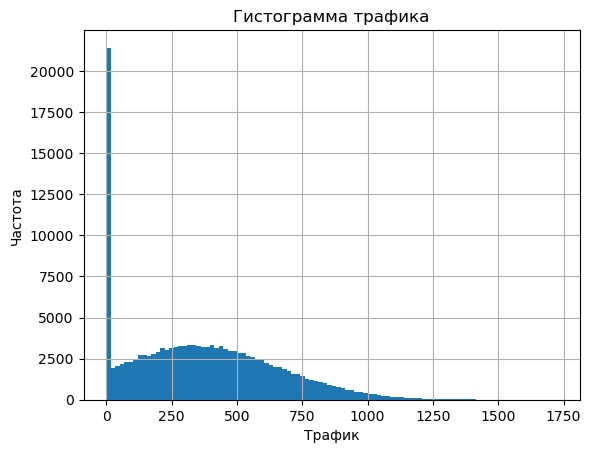

In [23]:
# Построим гистограмму объема трафика
df_internet['mb_used'].hist(bins = 100)
plt.title(f'Гистограмма трафика')
plt.xlabel(f'Трафик')
plt.ylabel('Частота')
plt.show()

In [24]:
print('Трафик, продолжительность которого равна нулю {0:.2%}'.format(df_internet.query('mb_used == 0').shape[0] \
                                                                          / df_internet.shape[0]))

Трафик, продолжительность которого равна нулю 13.12%


В данных по интернет-сессиям 13.12% это сессии, продолжительность которых равна нулю. Можно предроложить, что такая ситуация возникла, когда интернет у абонента подключен, но абонент не производил никакой активности. Будем считать, что трафик 0 это корректное значение.

# Шаг 2. Предобработка данных 
<a class="anchor" id="second-bullet"></a>

## Округление
Окрулгим значения в calls_df

In [25]:
# Звонки
df_calls['duration'] = np.ceil(df_calls['duration'])

#df_calls.loc[df_calls['duration'] == 0 ,'duration'] = 1
# Интернет-сессии
#df_internet['mb_used'] = np.ceil(df_internet['mb_used'])

#df_internet.loc[df_internet['mb_used'] == 0 ,'mb_used'] = 1

## Изменение типа данных

In [26]:
# Преобразование в даты
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d') 
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d') 
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
# Преобразование в int
df_calls['duration'] = df_calls['duration'].astype('int')
#df_internet['mb_used'] = df_internet['mb_used'].astype('int')

## Посчитаем значения, необходимые для анализа каждого пользователя

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [27]:
used_users = pd.DataFrame()

In [28]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

calls_in_month = df_calls.pivot_table(index=['month', 'user_id'],values='duration',aggfunc=['count', 'sum'])

df_temp = pd.DataFrame(calls_in_month.to_records())

used_users['user_id'] = df_temp['user_id']
used_users['month']   = df_temp['month']
used_users['calls']   = df_temp.iloc[:, 2]
used_users['minutes'] = df_temp.iloc[:, 3]


### Количество отправленных сообщений по месяцам

In [29]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

messages_in_month = df_messages.pivot_table(index=['month', 'user_id'],values='id',aggfunc='count')

df_temp = pd.DataFrame(messages_in_month.to_records()).rename(columns={'id': 'messages'})

used_users = used_users.merge(df_temp, on=['user_id', 'month'], how='outer')
used_users.head()

,user_id,month,calls,minutes,messages
0,1000,5,22.00,159.00,22.00
1,1000,6,43.00,172.00,60.00
2,1000,7,47.00,340.00,75.00
3,1000,8,52.00,408.00,81.00
4,1000,9,58.00,466.00,57.00


### Объем израсходованного интернет-трафика по месяцам

In [30]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

internet_in_month = df_internet.pivot_table(index=['month', 'user_id'],values='mb_used',aggfunc='sum')

df_temp = pd.DataFrame(internet_in_month.to_records())

used_users = used_users.merge(df_temp, on=['user_id', 'month'], how='outer')
used_users['mb_used']=np.ceil(used_users['mb_used'])

used_users.info()

used_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int32  
 2   calls     3174 non-null   float64
 3   minutes   3174 non-null   float64
 4   messages  2717 non-null   float64
 5   mb_used   3203 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 138.2 KB


,user_id,month,calls,minutes,messages,mb_used
0,1000,5,22.00,159.00,22.00,"2,254.00"
1,1000,6,43.00,172.00,60.00,"23,234.00"
2,1000,7,47.00,340.00,75.00,"14,004.00"
3,1000,8,52.00,408.00,81.00,"14,056.00"
4,1000,9,58.00,466.00,57.00,"14,569.00"


### Вывод

После всех преобразований и объединений данных по месяцу, можно наблюдать:
- количество сделанных звонков и израсходованных минут разговора;
- количество отправленных сообщений;
- объем израсходованного интернет-трафика в мегабайтах.

### Помесячная выручка с каждого пользователя

После формирования датафрейма по месяцам возникли пропуски. Некоторые пользователи в некоторые месяцы пользовались не всеми услугами. Например, кто-то только мобильным интернетом. Заполним пропуски нулями, чтобы  позже посмотреть на распределение.

In [31]:
features = ['calls', 'minutes', 'messages', 'mb_used']

for i in features:
    #заполняем пропуски 0 и изменяем тип данных на int
    used_users[i] = used_users[i].fillna(0).astype('int') 
used_users.info()
used_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   3214 non-null   int64
 1   month     3214 non-null   int32
 2   calls     3214 non-null   int32
 3   minutes   3214 non-null   int32
 4   messages  3214 non-null   int32
 5   mb_used   3214 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 88.0 KB


,user_id,month,calls,minutes,messages,mb_used
0,1000,5,22,159,22,2254
1,1000,6,43,172,60,23234
2,1000,7,47,340,75,14004
3,1000,8,52,408,81,14056
4,1000,9,58,466,57,14569


### Ежемесячный доход от каждого пользователя

Добавим в датафрейм информацию о пользователях и тарифах. Воспользуемся методом merge.

In [32]:
used_users = used_users.merge(df_users,on='user_id',how='outer')
used_users = used_users.merge(df_tariffs, on='tariff',how='outer')
used_users.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1001,11.00,59.00,430.00,0.00,"18,430.00",41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
1,1001,12.00,63.00,414.00,0.00,"14,037.00",41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,6.00,15.00,117.00,4.00,"10,857.00",59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1002,7.00,26.00,214.00,11.00,"17,581.00",59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
4,1002,8.00,42.00,289.00,13.00,"20,320.00",59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3


In [33]:
used_users['user_id'].value_counts()

user_id
1433    12
1308    12
1302    12
1299    12
1282    12
        ..
1190     1
1170     1
1336     1
1445     1
1223     1
Name: count, Length: 500, dtype: int64

In [34]:
df_users['user_id'].value_counts()

user_id
1000    1
1329    1
1342    1
1341    1
1340    1
       ..
1161    1
1160    1
1159    1
1158    1
1499    1
Name: count, Length: 500, dtype: int64

Перерасход минут, сообщений и трафика необходимо расчитывать,как разность между ежемесячным значением и включенным в тариф. Если итоговое значение больше 0 -то перерасход был, если  меньше 0 - то тариф использован без перерасхода

In [35]:
used_users['minutes_over']  = used_users['minutes'] - used_users['minutes_included']
used_users['messages_over'] = used_users['messages'] - used_users['messages_included']
used_users['mb_used_over']  = used_users['mb_used'] - used_users['mb_per_month_included']
used_users.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1001,11.00,59.00,430.00,0.00,"18,430.00",41,NaT,Москва,Иван,...,50,15360,500,550,200,3,3,-70.00,-50.00,"3,070.00"
1,1001,12.00,63.00,414.00,0.00,"14,037.00",41,NaT,Москва,Иван,...,50,15360,500,550,200,3,3,-86.00,-50.00,"-1,323.00"
2,1002,6.00,15.00,117.00,4.00,"10,857.00",59,NaT,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,-383.00,-46.00,"-4,503.00"
3,1002,7.00,26.00,214.00,11.00,"17,581.00",59,NaT,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,-286.00,-39.00,"2,221.00"
4,1002,8.00,42.00,289.00,13.00,"20,320.00",59,NaT,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,-211.00,-37.00,"4,960.00"


Создадим функцию одной строки для просчёта дополнительной стоимости минут, сообщений и трафика.

In [36]:
def monthly_calculation(row):
    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    
    # стоимость дополнительных минут
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']

    # стоимость дополнительных сообщений
    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']

    # стоимость дополнительного трафика
    if row['mb_used_over'] > 0:
        mb_used_price = np.ceil((row['mb_used_over'] / 1024)) * row['rub_per_gb']
        #mb_used_price = (row['mb_used_over'] // 1024 +1) * row['rub_per_gb']
    
    return minutes_price + messages_price + mb_used_price

Интернет трафик необходимо округлить в большую сторону с помощью метода np.ceil

Для дальнейшего анализа применим функцию и добавим новые столбцы в нашу таблицу

In [37]:
used_users['rub_monthly_fee_over'] = used_users.apply(monthly_calculation, axis=1)
used_users['rub_monthly_fee_total'] = used_users['rub_monthly_fee'] + used_users['rub_monthly_fee_over']
used_users.head()

,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
0,1001,11.00,59.00,430.00,0.00,"18,430.00",41,NaT,Москва,Иван,...,500,550,200,3,3,-70.00,-50.00,"3,070.00",600.00,"1,150.00"
1,1001,12.00,63.00,414.00,0.00,"14,037.00",41,NaT,Москва,Иван,...,500,550,200,3,3,-86.00,-50.00,"-1,323.00",0.00,550.00
2,1002,6.00,15.00,117.00,4.00,"10,857.00",59,NaT,Стерлитамак,Евгений,...,500,550,200,3,3,-383.00,-46.00,"-4,503.00",0.00,550.00
3,1002,7.00,26.00,214.00,11.00,"17,581.00",59,NaT,Стерлитамак,Евгений,...,500,550,200,3,3,-286.00,-39.00,"2,221.00",600.00,"1,150.00"
4,1002,8.00,42.00,289.00,13.00,"20,320.00",59,NaT,Стерлитамак,Евгений,...,500,550,200,3,3,-211.00,-37.00,"4,960.00","1,000.00","1,550.00"


In [38]:
# check
used_users['rub_monthly_fee_total'].sum()

4916951.0

In [39]:
used_users.columns

Index(['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'minutes_over', 'messages_over', 'mb_used_over', 'rub_monthly_fee_over',
       'rub_monthly_fee_total'],
      dtype='object')

In [40]:
# check
used_users[used_users['minutes'] > 500][['user_id', 'month', 'minutes', 'messages', 'mb_used', 'tariff',
       'minutes_over', 'messages_over', 'mb_used_over', 'rub_monthly_fee_over',
       'rub_monthly_fee_total']].tail(4)

,user_id,month,minutes,messages,mb_used,tariff,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
3212,1495,9.00,813.00,82.00,"33,068.00",ultra,"-2,187.00",-918.00,"2,348.00",450.00,"2,400.00"
3213,1495,10.00,"1,030.00",82.00,"29,363.00",ultra,"-1,970.00",-918.00,"-1,357.00",0.00,"1,950.00"
3214,1495,11.00,954.00,79.00,"38,940.00",ultra,"-2,046.00",-921.00,"8,220.00","1,350.00","3,300.00"
3215,1495,12.00,"1,031.00",84.00,"23,427.00",ultra,"-1,969.00",-916.00,"-7,293.00",0.00,"1,950.00"


Посмотрим количество пользователей по каждому тарифу

In [41]:
smart = used_users.query("tariff == 'smart'")
print('Количество пользователей smart: {}'.format(len(smart.groupby('user_id'))))

ultra = used_users.query("tariff == 'ultra'")
print('Количество пользователей ultra: {}'.format(len(ultra.groupby('user_id'))))

Количество пользователей smart: 351
Количество пользователей ultra: 149


### Выводы
Данные готовы и сгруппированы в одну таблицу для дальнейшего анализа, от всех пропусков избавились, в конечной таблице пользователей со smart оказалось - 350, а с ultra - 148 на это нужно будет обратить внимание.

# Шаг 3. Анализ данных 
<a class="anchor" id="third-bullet"></a>

## Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Объеденим данные клиентов оператора, исходя из выборки

In [42]:
values = ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']

Необходимо объеденить данные по тарифам для каждого месяца


In [43]:
tariff_monthly_used_users = used_users.pivot_table(index=['tariff', 'month'],values=values)

smart_monthly_costs = tariff_monthly_used_users.loc['smart']
smart_monthly_costs['mb_used'] = smart_monthly_costs['mb_used']/1024
smart_monthly_costs.rename(columns={'mb_used': 'gb_used'}, inplace=True)
display(smart_monthly_costs)
ultra_monthly_costs = tariff_monthly_used_users.loc['ultra']
ultra_monthly_costs['mb_used'] = ultra_monthly_costs['mb_used']/1024
ultra_monthly_costs.rename(columns={'mb_used': 'gb_used'}, inplace=True)
display(ultra_monthly_costs)

,gb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1.00,8.31,18.24,203.85,171.32,721.32
2.00,11.33,24.09,298.69,277.60,827.60
3.00,14.75,31.86,390.05,614.62,"1,164.62"
4.00,13.15,30.74,367.13,413.09,963.09
5.00,15.44,33.77,387.36,647.51,"1,197.51"
6.00,15.42,33.40,395.64,654.02,"1,204.02"
7.00,15.37,33.75,408.35,673.95,"1,223.95"
8.00,16.22,33.64,421.47,770.60,"1,320.60"
9.00,15.92,33.64,428.61,699.95,"1,249.95"


,gb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1.00,12.83,33.78,428.11,0.00,"1,950.00"
2.00,11.50,21.96,297.12,25.00,"1,975.00"
3.00,17.13,32.30,489.65,64.86,"2,014.86"
4.00,16.43,31.56,458.02,51.82,"2,001.82"
5.00,18.91,37.85,510.33,109.70,"2,059.70"
6.00,18.48,41.73,479.70,89.29,"2,039.29"
7.00,20.02,49.85,545.79,168.13,"2,118.13"
8.00,19.12,48.44,510.78,133.18,"2,083.18"
9.00,18.75,52.29,539.44,74.35,"2,024.35"


В данной таблице можно наблюдать минуты разговора, количество сообщений и объём интернет-трафика, которые пользователь расходует за месяц

In [44]:
tariff_usage = tariff_monthly_used_users.pivot_table(index='tariff',values=values)
tariff_usage.rename(columns={'mb_used': 'gb_used'}, inplace=True)
tariff_usage


,gb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
tariff,,,,,
smart,"15,058.89",31.41,386.76,629.92,"1,179.92"
ultra,"18,206.31",43.71,495.93,96.93,"2,046.93"


### Выводы
Пользователи тарифа ultra более активны, но пользователи тарифа smart тратят в среднем в 6 раз больше на дополнительные пакеты услуг. Оператор может использовать это для маркетинговой компании.
Оператору больше денег приносит тариф ultra, даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа smart не тратят столько денег, чтобы превысить стоимость тарифа ultra. Так, для пользователя выгоднее тариф smart.

## Дисперсия и стандартное отклонение

Дисперсия и стандартное отклонение позволяют определить распределение, на сколько много выбросов в нём и характер распределения

### Минуты разговора

In [45]:
smart['minutes'].describe()

count   2,229.00
mean      417.93
std       190.31
min         0.00
25%       282.00
50%       422.00
75%       545.00
max     1,435.00
Name: minutes, dtype: float64

In [46]:
ultra['minutes'].describe()

count     985.00
mean      526.62
std       317.61
min         0.00
25%       284.00
50%       518.00
75%       752.00
max     1,673.00
Name: minutes, dtype: float64

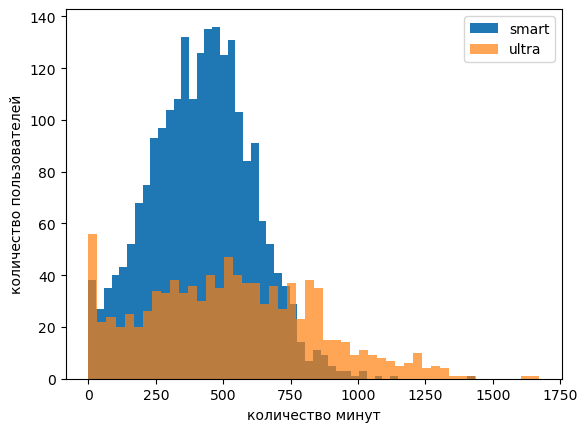

In [47]:
plt.hist(smart['minutes'], bins=50, label='smart')
plt.hist(ultra['minutes'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.show()

In [48]:
smart_minutes_var = np.var(smart['minutes'], ddof=1)
ultra_minutes_var = np.var(ultra['minutes'], ddof=1)
print('Дисперсия минут тарифа smart {}'.format(smart_minutes_var))
print('Дисперсия минут тарифа ultra {}'.format(ultra_minutes_var))

Дисперсия минут тарифа smart 36219.315784344246
Дисперсия минут тарифа ultra 100873.63339730092


In [49]:
smart_dict_minutes = {'Стандартное отклонение (мин)': smart['minutes'].std(),
             'Дисперсия': smart_minutes_var}
smart_d_minutes = pd.Series(smart_dict_minutes)
ultra_dict_minutes = {'Стандартное отклонение (мин)': ultra['minutes'].std(),
             'Дисперсия': ultra_minutes_var}
ultra_d_minutes = pd.Series(ultra_dict_minutes)
smart_ultra_minutes = pd.DataFrame({'Смарт': smart_d_minutes, 'Ультра': ultra_d_minutes})
smart_ultra_minutes

,Смарт,Ультра
Стандартное отклонение (мин),190.31,317.61
Дисперсия,"36,219.32","100,873.63"


#### Вывод:
Средняя продолжительность разговора по пользователям: у тарифа смарт - 418 минут, у тарифа ультра - 527 минут. Стоит отметить, что стандартное отклонение у тарифа смарт в 1.66 раз меньше, на графике это тоже заметно. Следует сказать, что примерно половина пользователей тарифа ультра используют преимущества данного тарифа (окупают потраченые деньги), т.к. другая половина расходует меньше 500 минут и могли бы пользоваться тарифом смарт. Возможно их больше интересуют сообщения, но скорее всего интернет трафик!

### Количество сообщений

In [50]:
smart['messages'].describe()

count   2,229.00
mean       33.38
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: messages, dtype: float64

In [51]:
ultra['messages'].describe()

count   985.00
mean     49.36
std      47.80
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: messages, dtype: float64

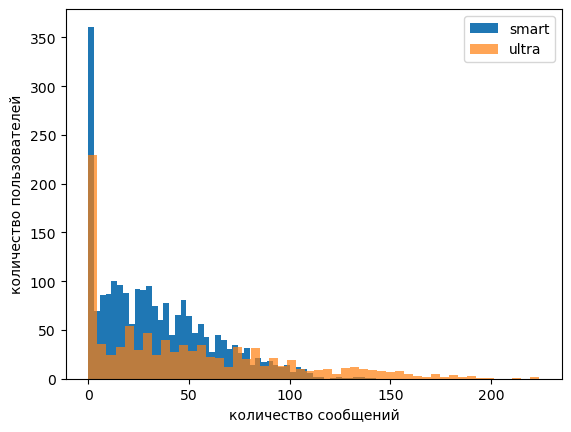

In [52]:
plt.hist(smart['messages'], bins=50, label='smart')
plt.hist(ultra['messages'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.show()

In [53]:
smart_messages_var = np.var(smart['messages'], ddof=1)
ultra_messages_var = np.var(ultra['messages'], ddof=1)
print('Дисперсия сообщений тарифа smart {}'.format(smart_messages_var))
print('Дисперсия сообщений тарифа ultra {}'.format(ultra_messages_var))

Дисперсия сообщений тарифа smart 796.8129584480083
Дисперсия сообщений тарифа ultra 2285.2661425446836


In [54]:
smart_dict_messages = {'Стандартное отклонение (сообщения)': smart['messages'].std(),
             'Дисперсия': smart_messages_var}
smart_d_messages = pd.Series(smart_dict_messages)
ultra_dict_messages = {'Стандартное отклонение (сообщения)': ultra['messages'].std(),
             'Дисперсия': ultra_messages_var}
ultra_d_messages = pd.Series(ultra_dict_messages)
smart_ultra_messages = pd.DataFrame({'Смарт': smart_d_messages, 'Ультра': ultra_d_messages})
smart_ultra_messages

,Смарт,Ультра
Стандартное отклонение (сообщения),28.23,47.80
Дисперсия,796.81,"2,285.27"


#### Вывод:
Среднее количество отпраавленных сообщений: у тарифа смарт - 33 сообщения, у тарифа ультра - 49 сообщений. Стоит отметить, что стандартное отклонение у тарифа смарт в 1.67 раз меньше, на графике это тоже заметно. Необходимо сказать что обычные сообщения не так популярны в наше время. В тарифе ультра есть любители такого способа общения (которые отправляют больше 50 сообщений), но их среднея часть отправляет всего 49 сообщений, когда в абонентскую плату тарифа смарт включено 50 сообщений. Поэтому и возникает такое большое стандартное отклонение!

### Интернет-трафик

In [55]:
smart['gb_used']=smart['mb_used']/1024
smart['gb_used'].describe()

D:\Temp\ipykernel_41484\2087636091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart['gb_used']=smart['mb_used']/1024


count   2,229.00
mean       15.83
std         5.73
min         0.00
25%        12.35
50%        16.12
75%        19.57
max        37.65
Name: gb_used, dtype: float64

In [56]:
ultra['gb_used']=ultra['mb_used']/1024
ultra['gb_used'].describe()

D:\Temp\ipykernel_41484\550917311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra['gb_used']=ultra['mb_used']/1024


count   985.00
mean     19.01
std       9.85
min       0.00
25%      11.50
50%      18.86
75%      26.21
max      48.58
Name: gb_used, dtype: float64

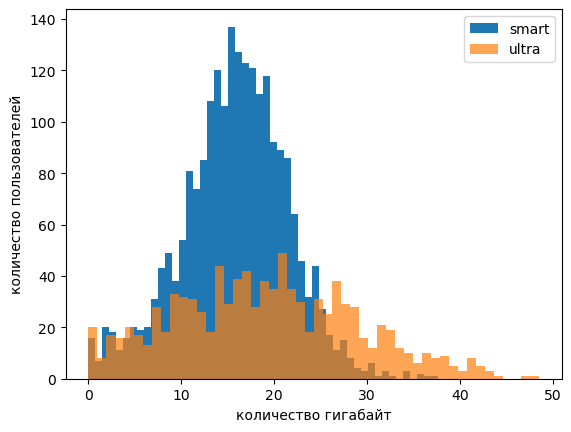

In [57]:
plt.hist(smart['mb_used']/1024, bins=50, label='smart')
plt.hist(ultra['mb_used']/1024, bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.xlabel('количество гигабайт')
plt.ylabel('количество пользователей')
plt.show()

In [58]:
smart_mb_var = np.var(smart['mb_used']/1024, ddof=1)
ultra_mb_var = np.var(ultra['mb_used']/1024, ddof=1)
print('Дисперсия гигабайт тарифа smart {}'.format(smart_mb_var))
print('Дисперсия гигабайт тарифа ultra {}'.format(ultra_mb_var))

Дисперсия гигабайт тарифа smart 32.866057855890205
Дисперсия гигабайт тарифа ultra 97.03770619857964


In [59]:
smart_dict_mb = {'Стандартное отклонение (гигабайт)': smart['mb_used'].std()/1024,
             'Дисперсия': smart_mb_var}
smart_d_mb = pd.Series(smart_dict_mb)
ultra_dict_mb = {'Стандартное отклонение (гигабайт)': ultra['mb_used'].std()/1024,
             'Дисперсия': ultra_mb_var}
ultra_d_mb = pd.Series(ultra_dict_mb)
smart_ultra_mb = pd.DataFrame({'Смарт': smart_d_mb, 'Ультра': ultra_d_mb})
smart_ultra_mb

,Смарт,Ультра
Стандартное отклонение (гигабайт),5.73,9.85
Дисперсия,32.87,97.04


#### Вывод:
Среднее количество использованого трафика: у тарифа смарт - 15.8 гб, у тарифа ультра - 19 гб. Чуть меньше половины пользователей в тарифе смарт используют интернет-трафика сврех лимита. Возможно их не так сильно интересуют минуты разговора и сообщения, поэтому что бы не доплачивать за тариф ультра, они готовы пользваться тарифом смарт и доплачивать отдельно только за интернет-трафик!

### Cреднее количество по Москве и другим регионам

In [60]:
moscow = used_users['city'] == 'Москва'
used_users['city'].where(moscow, 'Другой регион', inplace=True)

city_monthly_costs = used_users.pivot_table(index=['city', 'month'],values=values)

D:\Temp\ipykernel_41484\454408660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_users['city'].where(moscow, 'Другой регион', inplace=True)


In [61]:
city_usage = city_monthly_costs.pivot_table(index='city',values=values)
city_usage['mb_used'] = city_usage['mb_used']/1024
city_usage.rename(columns={'mb_used': 'gb_used'}, inplace=True)
city_usage

,gb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
city,,,,,
Другой регион,15.29,35.27,413.25,477.92,"1,424.46"
Москва,17.17,33.94,444.01,416.46,"1,511.43"


### Вывод
По средним значениям дохода от пользователей Москвы и регионов видно, что разница варьируется в районе 100 рублей.
Сообщения и минуты приблизительно одинаково тратятся везде, в Москве больше тратят трафика интернета.

# Шаг 4. Проверим гипотезы 
<a class="anchor" id="fourth-bullet"></a>

## Гипотеза №1 - Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается
- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов "Ультра" и "Смарт" НЕ различается

- Исходя из H₀ формулируется альтернативная гипотеза H₁: Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

- Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [62]:
alpha = 0.05 # критический уровень статистической значимости
             # отвергнем гипотезу, если p-value окажется меньше него 

results = st.ttest_ind(
    smart['rub_monthly_fee_total'], 
    ultra['rub_monthly_fee_total'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.08190955548901e-161
Отвергаем нулевую гипотезу


### Вывод
Средняя выручка пользователей тарифов «Ультра» и «Смарт» дейтсвительно различаются - наша гипотеза подтвердилась. Об этом говорит почти Нулевая(H₀) вероятность. Случайно получить такое отличие в значениях практически не получится.

## Гипотеза №2 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- Нулевая гипотеза H₀: Cредняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов
- Исходя из H₀ формулируется альтернативная гипотеза H₁: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [63]:
alpha = 0.05 # критический уровень статистической значимости
             # отвергнем гипотезу, если p-value окажется меньше него  

moscow = used_users.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = used_users.query("city == 'Другой регион'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


In [64]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Вывод
Полученное значение p-value говорит о том, что с вероятностью,более 54% различие средней выручки по Москве и другим регионам можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой по Москве и средней выручкой по другим регионам. Поэтому средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

# Шаг 5. Общий вывод 
<a class="anchor" id="fifth-bullet"></a>

Из двух гипотез подтвердилась только одна: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
 
В первой гипотезе шанс, что средняя выручка будет одинакова равна $$ 8 * \frac{1}{10^{180}}$$ Это очень маленький процент, и поэтому наша гипотеза подтвердилась.
 
Во второй гипотезе с вероятностью, более 54% различие средней выручки по Москве и другим регионам можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой по Москве и средней выручкой по другим регионам. Поэтому средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
 
Также были построены графики, были выявлены различия использования пакета, построены следующие таблицы.

In [65]:
display(smart_ultra_minutes)

display(smart_ultra_messages)

display(smart_ultra_mb)

,Смарт,Ультра
Стандартное отклонение (мин),190.31,317.61
Дисперсия,"36,219.32","100,873.63"


,Смарт,Ультра
Стандартное отклонение (сообщения),28.23,47.80
Дисперсия,796.81,"2,285.27"


,Смарт,Ультра
Стандартное отклонение (гигабайт),5.73,9.85
Дисперсия,32.87,97.04


Какой же тариф лучше?

- исходя из вышеприведенного анализа выборочных совокупностей и гипотезы, можем сказать:

- для оператора – выгоднее тариф Ультра, потому что он приносит больше денег; для пользователя – выгоднее тариф Смарт, потому что полного пакета в среднем хватает пользователям.

In [66]:
used_users.columns

Index(['user_id', 'month', 'calls', 'minutes', 'messages', 'mb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'minutes_over', 'messages_over', 'mb_used_over', 'rub_monthly_fee_over',
       'rub_monthly_fee_total'],
      dtype='object')

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\Temp\ipykernel_41484\2416222052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(y='tariff', x=column, kind="box", data=used_users, orient='h', palette = 'pastel')
D:\Temp\ipykernel_41484\2416222052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(y='tariff', x=column, kind="box", data=used_users, orient='h', palette = 'pastel')
D:\Temp\ipykernel_41484\2416222052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(y='tariff', x=column, kind="box", data=used_users, orient='h', palette = 'pastel')
D:\Temp\ipykernel_41484\2

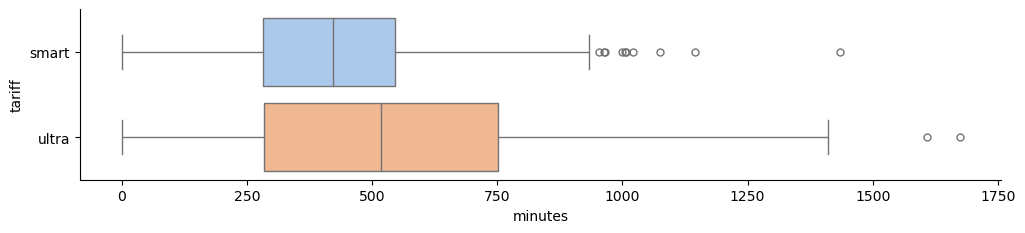

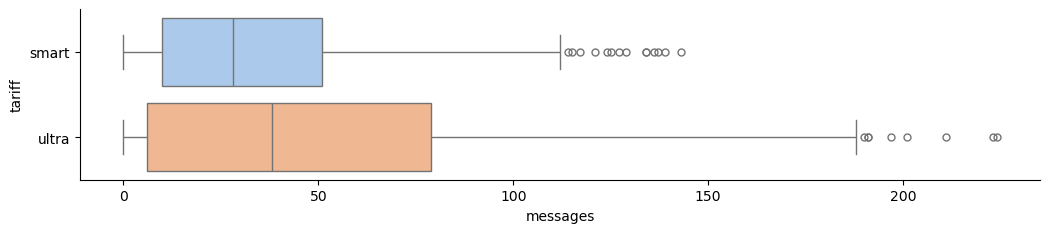

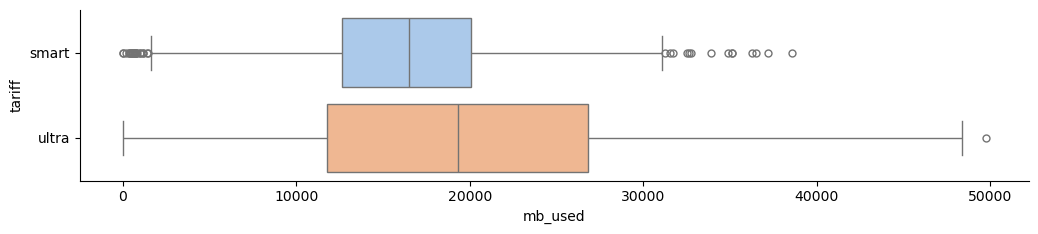

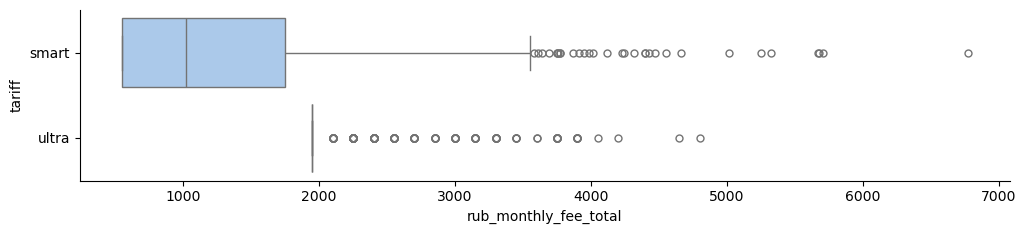

In [68]:
for column in ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_total']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data=used_users, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

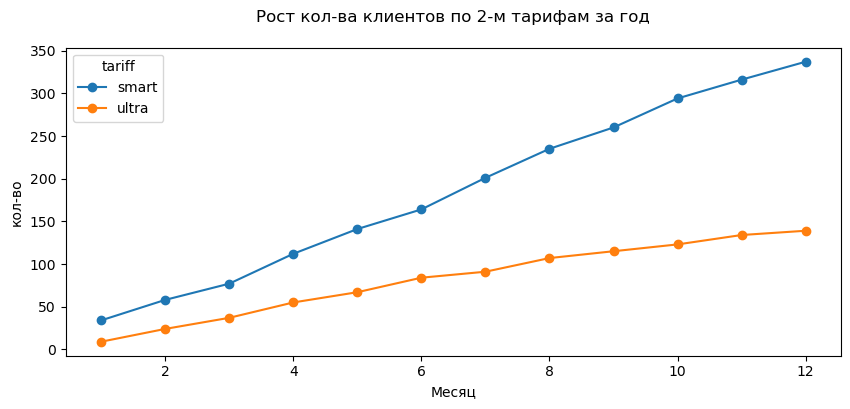

In [69]:
(used_users
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост кол-ва клиентов по 2-м тарифам за год'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('кол-во');

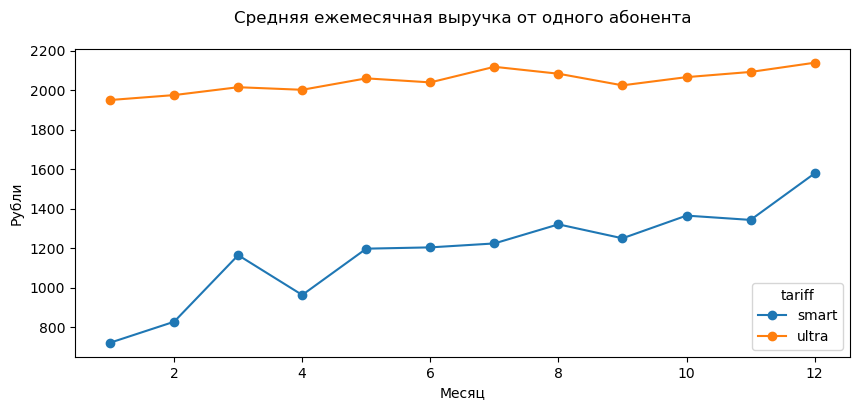

In [70]:
(used_users
 .pivot_table(index='tariff', columns='month', values='rub_monthly_fee_total', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

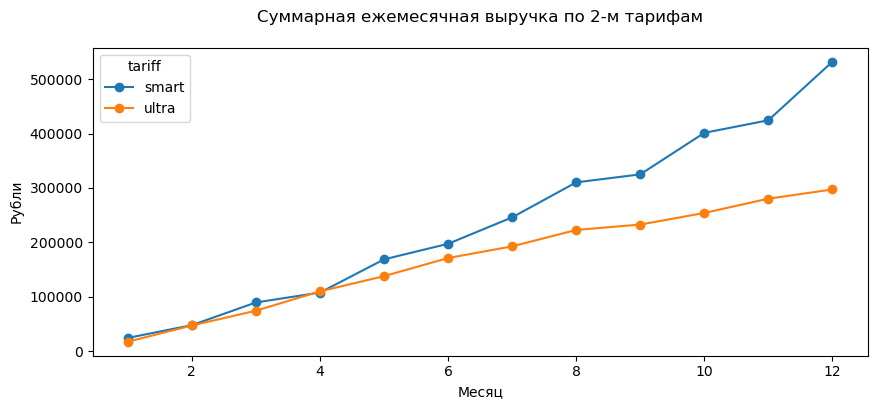

In [71]:
(used_users
 .pivot_table(index='tariff', columns='month', values='rub_monthly_fee_total', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

**Выручка от смартов уже в два раза выше выручки от ультры, но есть опасность - убегут клиенты смарт от такой счастливой жизни к конкурентам**

In [72]:

df_users = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Статистический анализ данных//users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


**Мы не ограничены в рекомендациях бизнесу только двумя тарифами, если мы видим риски для бизнеса мы можем предложить и третий и четвертый вариант развития тарифной политики**